In [51]:
from sklearn.datasets import load_diabetes
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
dataset = load_diabetes()

In [8]:
df_diabetes = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [9]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
X= df_diabetes
y = dataset['target']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [19]:
corr = X_train.corr()

<Axes: >

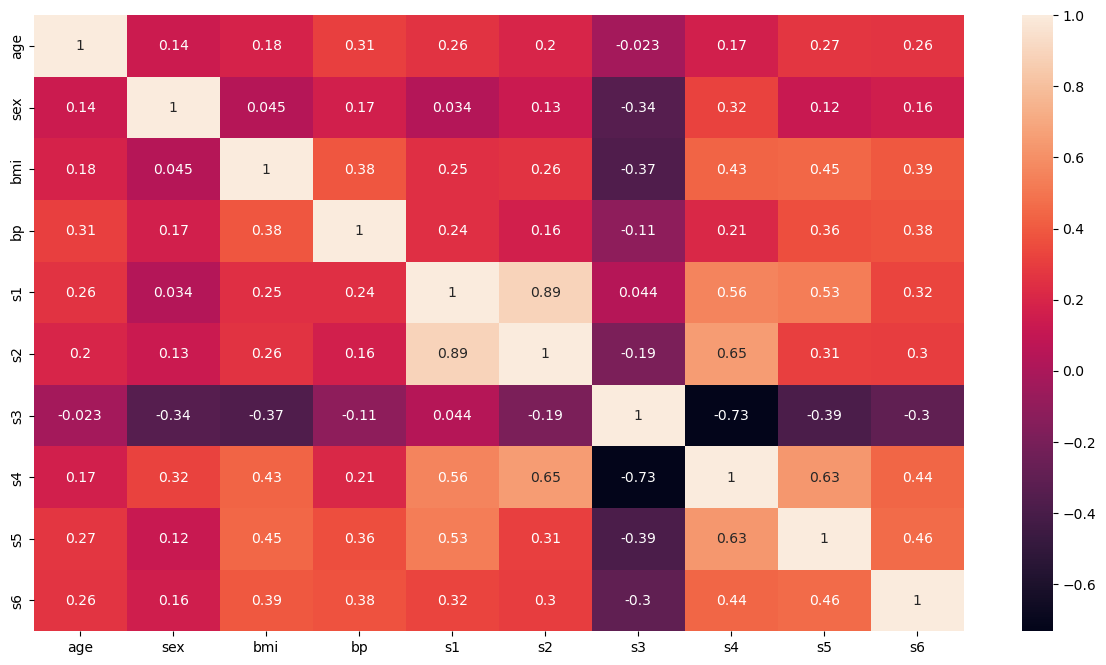

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,annot=True)

In [26]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [43]:
param_grid = {
    'criterion' : ['squared_error','friedman_mse','absolute_error'],
    'splitter': ['best','random'],
    'max_depth': list(range(1,26)),
    'max_features': ['sqrt','log2']
}

In [44]:
grid = GridSearchCV(dt,param_grid=param_grid,cv=5,scoring = 'neg_mean_squared_error')

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [46]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [47]:
y_pred = grid.predict(X_test)

In [48]:
metrics = [r2_score,mean_absolute_error,mean_squared_error]
for metric in metrics:
    score = metric(y_test,y_pred)
    print(f'{metric.__name__} score is :{score:.4f}')

r2_score score is :0.4317
mean_absolute_error score is :44.4692
mean_squared_error score is :3067.9482


In [49]:
selectedmodel=DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='sqrt',splitter='random')

In [50]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='sqrt', splitter='random')

[Text(0.5, 0.875, 'x[2] <= -0.004\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[6] <= 0.03\nsquared_error = 3335.473\nsamples = 157\nvalue = 114.484'),
 Text(0.125, 0.375, 'x[0] <= -0.028\nsquared_error = 3735.705\nsamples = 108\nvalue = 123.213'),
 Text(0.0625, 0.125, 'squared_error = 2218.354\nsamples = 36\nvalue = 112.25'),
 Text(0.1875, 0.125, 'squared_error = 4404.24\nsamples = 72\nvalue = 128.694'),
 Text(0.375, 0.375, 'x[1] <= -0.018\nsquared_error = 1915.246\nsamples = 49\nvalue = 95.245'),
 Text(0.3125, 0.125, 'squared_error = 1991.496\nsamples = 32\nvalue = 107.938'),
 Text(0.4375, 0.125, 'squared_error = 897.64\nsamples = 17\nvalue = 71.353'),
 Text(0.75, 0.625, 'x[7] <= -0.028\nsquared_error = 5790.907\nsamples = 152\nvalue = 194.618'),
 Text(0.625, 0.375, 'x[2] <= 0.107\nsquared_error = 5858.125\nsamples = 32\nvalue = 145.0'),
 Text(0.5625, 0.125, 'squared_error = 5614.348\nsamples = 31\nvalue = 141.323'),
 Text(0.6875, 0.125, 'squared_

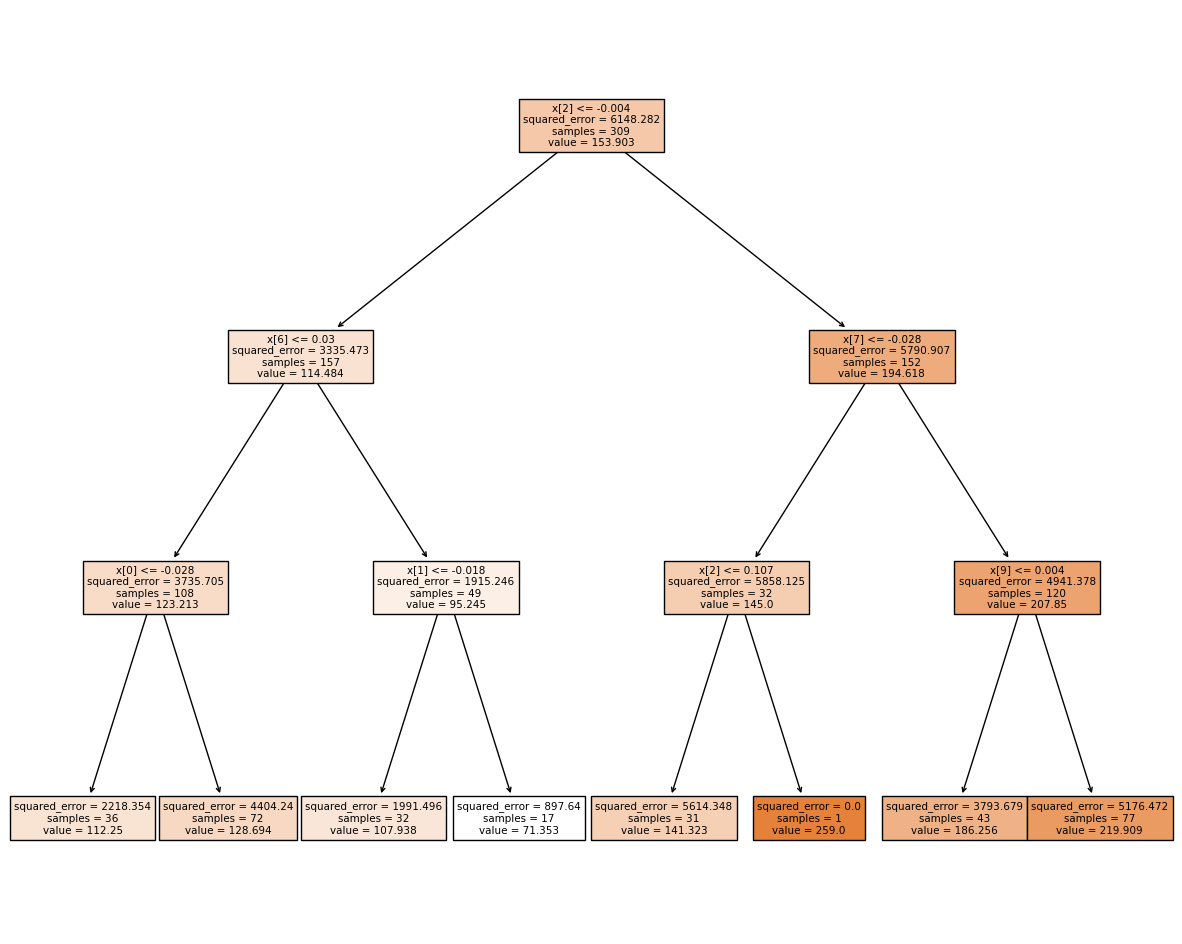

In [52]:
plt.figure(figsize=(15,12))
tree.plot_tree(selectedmodel,filled=True)